# Preparation Data

In [1]:


from haversine import haversine, Unit
import matplotlib.pyplot as plt
import pandas as pd
import pandasql as ps
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from scipy.stats import gaussian_kde
from datetime import datetime
import math
import mysql.connector
from mysql.connector import Error
import pandas as pd
import streamlit as st
#sjlsajlfaklfsjalj


In [2]:


data_listings = pd.read_csv("DQLab_listings(22Sep2022) (1).csv")
data_reviews = pd.read_csv("DQLab_reviews(22Sep2022).csv")
data_neighbourhood= pd.read_csv("DQLab_nieghbourhood(22Sep2022).csv")



In [4]:
data_listings

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,0,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Bukit Timah,1.334320,103.785210,Private room,80,92,365
1,1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340
2,2,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,Tampines,1.347540,103.959580,Private room,85,92,265
3,3,71903,Room 2-near Airport & EXPO,367042,Belinda,Tampines,1.345310,103.961000,Private room,85,92,365
4,4,275344,15 mins to Outram MRT Single Room,1439258,Kay,Bukit Merah,1.288360,103.811440,Private room,49,60,296
...,...,...,...,...,...,...,...,...,...,...,...,...
4156,4156,720000271010003429,"Marine Parade 2br w/ gym, bbq & pool, nr airport",466330896,Blueground,Marine Parade,1.299569,103.898567,Entire home/apt,263,92,365
4157,4157,720000552643956732,"Orchard 2br w/ gym, bbq & pool, nr Somerset MRT",466330896,Blueground,Newton,1.301816,103.839077,Entire home/apt,354,92,365
4158,4158,720695231887902167,Zi Xuan Apartments,480404953,Natividad,Newton,1.307921,103.831502,Entire home/apt,398,4,358
4159,4159,720724511357857504,#7 Studio with toilet & kitchen @Sks Pavillion,158018542,Betris,Woodlands,1.470580,103.762420,Private room,27,1,87


In [9]:
data_nieghbourhood

,Unnamed: 0,neighbourhood_group,neighbourhood
0,0,Central Region,Bishan
1,1,Central Region,Bukit Merah
2,2,Central Region,Bukit Timah
3,3,Central Region,Downtown Core
4,4,Central Region,Geylang
5,5,Central Region,Kallang
6,6,Central Region,Marina East
7,7,Central Region,Marina South
8,8,Central Region,Marine Parade
9,9,Central Region,Museum


In [10]:
data_reviews

,Unnamed: 0,listing_id,date
0,28,71609,2018-07-14
1,29,71609,2019-01-06
2,30,71609,2019-07-27
3,31,71609,2019-08-11
4,32,71609,2019-09-07
...,...,...,...
49690,58245,712907319520281078,2022-09-14
49691,58246,712907319520281078,2022-09-15
49692,58247,712907319520281078,2022-09-16
49693,58248,713608959415048233,2022-09-17


# Exploratory  Data

Join Data Menggunakan SQL

Membuat Dabase 

In [3]:
import sqlite3 
#membuat koneksi ke database 
conn = sqlite3.connect('database_airbnb')

#connect dataframe ke dalam tabel database
data_listings.to_sql('data_listings', conn, if_exists='replace', index = False)
data_reviews.to_sql('data_reviews', conn, if_exists='replace', index = False)
data_neighbourhood.to_sql('data_neighbourhood', conn , if_exists='replace', index = False)


55

In [4]:
query = ''' 
        select dl.id, dl.name, dl.host_id, dl.host_name, dl.neighbourhood, dl.latitude, dl.longitude, 
        dl.room_type, dl.price, dl.minimum_nights, dl.availability_365, dn.neighbourhood_group,  
        dr.date as review_date
        from data_listings as dl
        left join data_neighbourhood as dn on dl.neighbourhood= dn.neighbourhood
        left join data_reviews as dr on dl.id = dr.listing_id 
        order by dl.host_id
'''
dataset = pd.read_sql_query(query,conn)
dataset  = dataset.dropna()
dataset.to_sql('dataset', conn , if_exists='replace', index = False)
dataset

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,neighbourhood_group,review_date
0,31114726,"Very large, clean, comfortable room.",23666,Maryanne,Marine Parade,1.311120,103.906660,Entire home/apt,90,92,325,Central Region,2019-01-22
1,31114726,"Very large, clean, comfortable room.",23666,Maryanne,Marine Parade,1.311120,103.906660,Entire home/apt,90,92,325,Central Region,2019-02-28
2,31114726,"Very large, clean, comfortable room.",23666,Maryanne,Marine Parade,1.311120,103.906660,Entire home/apt,90,92,325,Central Region,2019-03-03
3,31114726,"Very large, clean, comfortable room.",23666,Maryanne,Marine Parade,1.311120,103.906660,Entire home/apt,90,92,325,Central Region,2019-03-28
4,31114726,"Very large, clean, comfortable room.",23666,Maryanne,Marine Parade,1.311120,103.906660,Entire home/apt,90,92,325,Central Region,2019-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51361,712014563808839949,Queen Capsule Bed (mixed dorm),478783235,Wonders Hostel,Singapore River,1.286313,103.849075,Shared room,60,1,346,Central Region,2022-09-18
51363,712121357550091568,Single Capsule (Shared Room),478783235,Wonders Hostel,Singapore River,1.288168,103.847224,Shared room,29,1,259,Central Region,2022-09-13
51364,712907319520281078,Charming hostel in singapore (Boat Quay),478783235,Wonders Hostel,Singapore River,1.285854,103.849037,Shared room,31,1,342,Central Region,2022-09-14
51365,712907319520281078,Charming hostel in singapore (Boat Quay),478783235,Wonders Hostel,Singapore River,1.285854,103.849037,Shared room,31,1,342,Central Region,2022-09-15


Menambahkan Column last_review dan total review

In [5]:

data= """ select dl.id, dl.name, dl.host_id, dl.host_name, dl.neighbourhood, dl.latitude, dl.longitude,dl.room_type, dl.price, dl.minimum_nights, dl.availability_365, dn.neighbourhood_group,  MAX(dr.date) as last_review, count(dr.listing_id) as total_review
                        from data_listings as dl
                        left join data_neighbourhood as dn on dl.neighbourhood = dn.neighbourhood
                        left join data_reviews as dr on dl.id = dr.listing_id 
                        group by dl.id
                        order by dl.price desc
                        
                        """

data = pd.read_sql_query(data, conn)
data = data.dropna()
data.to_sql('data', conn , if_exists='replace', index = False)
data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,neighbourhood_group,last_review,total_review
0,28601709,"富力公主湾商场公寓 R&F Mall, link bridge to JB Customs",65839450,Lin,Woodlands,1.46030,103.76888,Entire home/apt,12494,2,181,North Region,2019-10-28,1
4,14289091,One bed room condominium,87219452,Michael,Pasir Ris,1.37620,103.96172,Entire home/apt,7286,92,0,East Region,2018-09-29,1
7,36461692,"[TOP PICK] Country Garden, JB (WIFI GYM POOL)",150501550,Asyraf,Lim Chu Kang,1.46567,103.72744,Entire home/apt,4660,30,180,North Region,2020-03-15,31
14,35105091,Cosy 2BR Teega Residence near Legoland,163025370,Sharm,Western Water Catchment,1.41382,103.65441,Entire home/apt,3107,5,80,West Region,2022-05-03,4
15,41606210,【Above R&F】Golden Egg-Walk to CIQ JBCC CS（6-8PAX）,328044392,Golden,Woodlands,1.46035,103.77139,Entire home/apt,3106,60,268,North Region,2020-03-29,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4148,37302795,DRAGON INN PREMIUM HOTEL (JB) SDN BHD,280825642,Ramir,Woodlands,1.45951,103.76555,Hotel room,19,1,144,North Region,2019-12-01,1
4153,38224254,[Bungalow Homestay] Johor Bahru Bedroom 4,290427273,Akmalina,Sungei Kadut,1.46426,103.74413,Private room,16,1,90,North Region,2019-09-17,1
4154,29837000,R&F Princess Cove common room for rent,31557595,Jay,Woodlands,1.45856,103.76684,Private room,16,30,332,North Region,2022-08-17,1
4155,15544996,Bedroom in JB with quick access to Singapore,100026900,Dharmalingam,Woodlands,1.47115,103.76966,Private room,16,1,91,North Region,2020-02-04,1


## Statistik Deskriptif


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2486 entries, 0 to 4156
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2486 non-null   int64  
 1   name                 2486 non-null   object 
 2   host_id              2486 non-null   int64  
 3   host_name            2486 non-null   object 
 4   neighbourhood        2486 non-null   object 
 5   latitude             2486 non-null   float64
 6   longitude            2486 non-null   float64
 7   room_type            2486 non-null   object 
 8   price                2486 non-null   int64  
 9   minimum_nights       2486 non-null   int64  
 10  availability_365     2486 non-null   int64  
 11  neighbourhood_group  2486 non-null   object 
 12  last_review          2486 non-null   object 
 13  total_review         2486 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 291.3+ KB


In [13]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,availability_365,total_review
count,2.486000e+03,2.486000e+03,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000
mean,1.154330e+17,1.571637e+08,1.358427,103.805941,163.972245,45.527755,239.886967,19.989944
std,2.458893e+17,1.370890e+08,0.072762,0.070410,355.829136,65.186350,129.230761,38.227092
min,7.160900e+04,2.366600e+04,1.256442,103.638880,15.000000,1.000000,0.000000,1.000000
25%,2.412669e+07,4.187059e+07,1.298272,103.767753,54.000000,1.000000,115.250000,2.000000
50%,3.723853e+07,1.243226e+08,1.317130,103.835140,88.000000,6.000000,295.000000,5.000000
75%,5.177657e+07,2.582789e+08,1.457530,103.854507,183.000000,92.000000,357.000000,19.000000
max,7.163239e+17,4.787832e+08,1.488000,103.977662,12494.000000,1000.000000,365.000000,413.000000


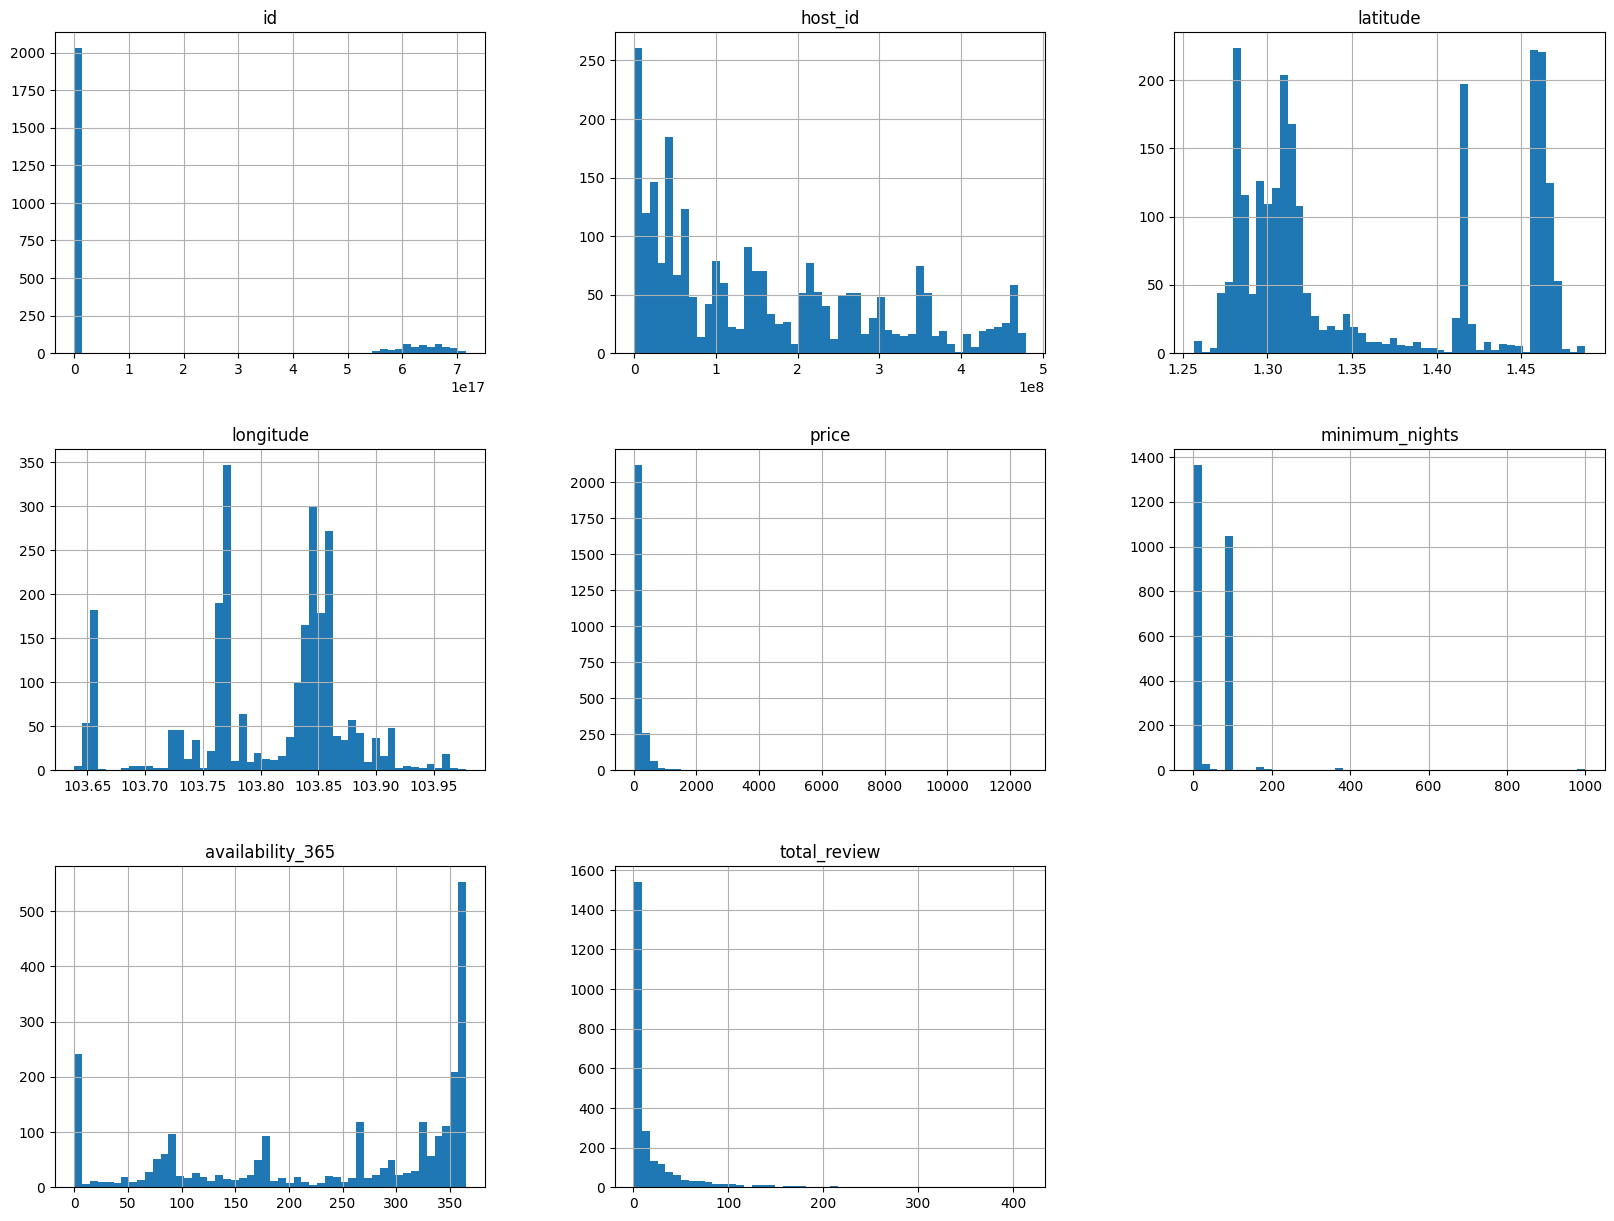

In [14]:

data.hist(bins=50, figsize=(20,15))
plt.show()

C:\Users\Raffi\AppData\Local\Temp\ipykernel_11568\1780824349.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.price, shade=True)


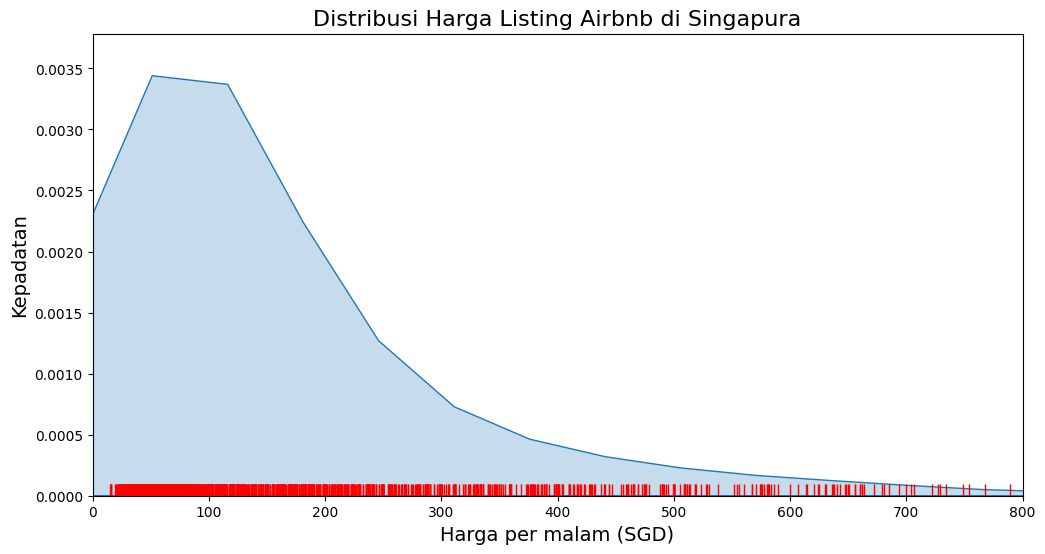

In [15]:


plt.figure(figsize=(12, 6))
sns.kdeplot(data.price, shade=True)
sns.rugplot(data.price, color='r')
plt.title('Distribusi Harga Listing Airbnb di Singapura', fontsize=16)
plt.xlabel('Harga per malam (SGD)', fontsize=14)
plt.ylabel('Kepadatan', fontsize=14)
plt.xlim(0, 800)
plt.show()

Outlier pada data

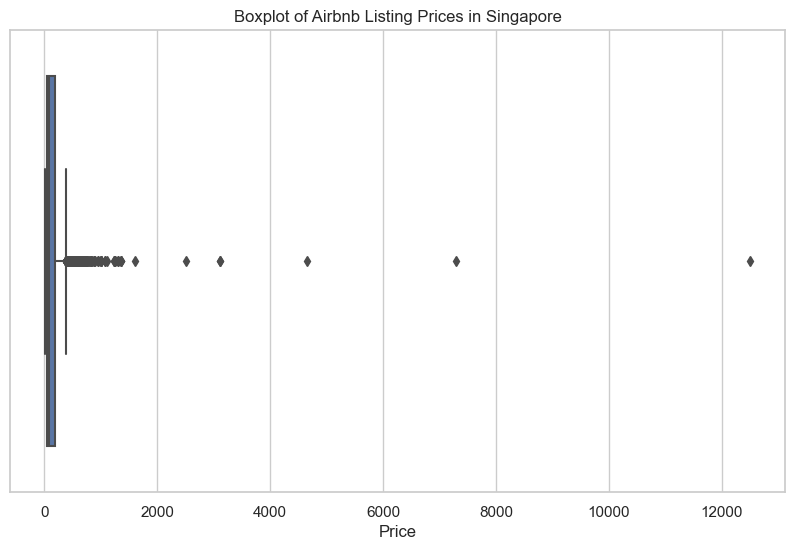

In [6]:

sns.set(style ="whitegrid")
plt.figure(figsize = (10,6))
sns.boxplot(x=data['price'])
plt.title("Boxplot of Airbnb Listing Prices in Singapore")
plt.xlabel("Price")
plt.show()


Menghapus Outlier pada data

In [6]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (0.4 * IQR)

df = data[(data['price'] > lower_bound) & (data['price'] < upper_bound)]
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,neighbourhood_group,last_review,total_review
1050,635937428811021850,New Cozy Studio Apt@ Somerset/Orchard Area,10248444,Binh Chan,River Valley,1.294390,103.838610,Entire home/apt,233,2,325,Central Region,2022-08-18,3
1052,549186561382713865,NEW Deluxe Comfy Studio Apt @Orchard/Somerset ...,10248444,Binh Chan,River Valley,1.294800,103.838410,Entire home/apt,233,2,345,Central Region,2022-09-07,8
1061,54205551,Serviced apartment- Unique Penthhouse in city,24496358,Katherine,Novena,1.318524,103.847511,Entire home/apt,230,6,277,Central Region,2022-05-23,1
1062,54204802,Novena Serviced Apartment - Luxe Penthhouse,68059127,Wei,Novena,1.318524,103.847511,Entire home/apt,230,6,277,Central Region,2022-09-17,2
1067,23045739,Executive SG Clean Apartment in Singapore Central,148161755,Jan,Rochor,1.298060,103.852570,Entire home/apt,230,6,0,Central Region,2022-09-17,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4148,37302795,DRAGON INN PREMIUM HOTEL (JB) SDN BHD,280825642,Ramir,Woodlands,1.459510,103.765550,Hotel room,19,1,144,North Region,2019-12-01,1
4153,38224254,[Bungalow Homestay] Johor Bahru Bedroom 4,290427273,Akmalina,Sungei Kadut,1.464260,103.744130,Private room,16,1,90,North Region,2019-09-17,1
4154,29837000,R&F Princess Cove common room for rent,31557595,Jay,Woodlands,1.458560,103.766840,Private room,16,30,332,North Region,2022-08-17,1
4155,15544996,Bedroom in JB with quick access to Singapore,100026900,Dharmalingam,Woodlands,1.471150,103.769660,Private room,16,1,91,North Region,2020-02-04,1


In [8]:
df.sort_values(by= "price")
df.to_sql('df', conn , if_exists='replace', index = False)

2050

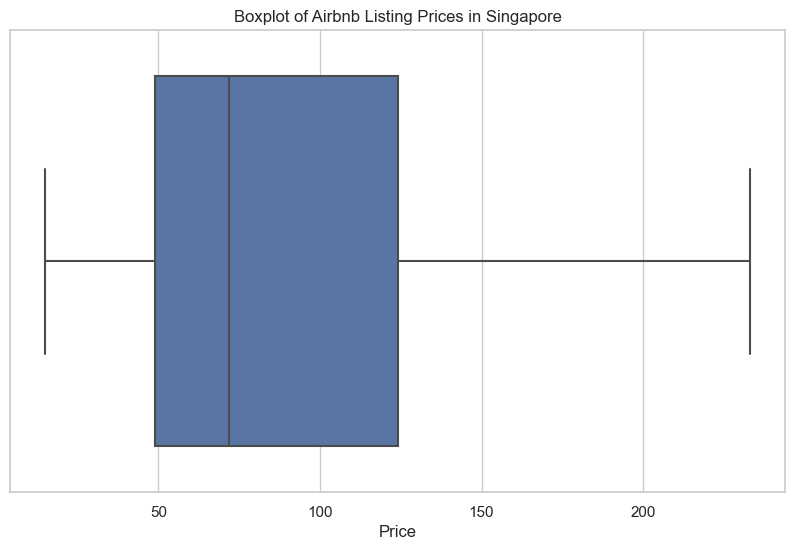

In [9]:

box_plot =sns.set(style ="whitegrid")
box_plot =plt.figure(figsize = (10,6))
box_plot =sns.boxplot(x=df['price'])
box_plot =plt.title("Boxplot of Airbnb Listing Prices in Singapore")
box_plot =plt.xlabel("Price")
box_plot =plt.show()

## Top Host Name

In [10]:
data_top_host_name_10 = """ select host_id, host_name, count(id) as total_listing, sum(total_review) as total_review
                                  from df
                                  group by host_id
                                  order by total_review desc
                                  limit 10
                            """

data_top_host_name = """ select host_id, host_name, count(id) as total_listing, sum(total_review) as total_review
                                  from df
                                  group by host_id
                                  order by total_review desc
                                  
                            """

data_top_host_name = pd.read_sql_query(data_top_host_name, conn)
data_top_host_name_10 = pd.read_sql_query(data_top_host_name_10, conn)
data_top_host_name_10.to_sql('data_top_host_name_10', conn , if_exists='replace', index = False)

10

Visualisasi Top Host Name

In [32]:


colors = ["#FFACAC","#FFBFA9","#FFBFA9","#FFBFA9","#FFBFA9","#FFBFA9","#FFBFA9","#FFBFA9","#FFBFA9","#FFBFA9"]


plot_top_10_review = px.bar(data_top_host_name_10, x="host_name", y="total_review", color="host_name", color_discrete_sequence=colors, template="ggplot2")



# modify Title
plot_top_10_review.update_layout(title = "<b>Top 10 Host Name According Total Review<b>", 
                                 title_font= dict(size = 18, color= "black", family = "arial"),
                                  title_x=0.5,showlegend=False)

#update label x dan y
plot_top_10_review.update_xaxes(title= "<b> Host name <b>", title_font= dict(size = 12, color="black", family = "arial"))
plot_top_10_review.update_yaxes(title = "<b> Total Reviews", title_font= dict(size = 12, color = "black", family = "arial"))

# update xtick dan ytick
plot_top_10_review.update_xaxes(tickfont=dict(size=10, family="arial", color = "black"),tickangle=10)



plot_top_10_review.show()


16.663850992852165 17.158068198442063
0.43962224043956066


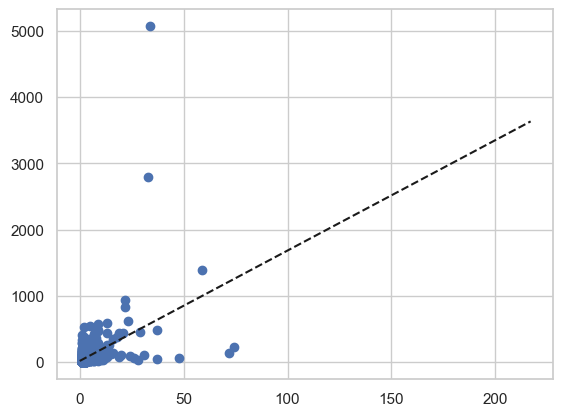

In [24]:



m, c = np.polyfit(data_top_host_name['total_listing'], data_top_host_name['total_review'], 1)
print(m, c)
print(data_top_host_name['total_review'].corr(data_top_host_name['total_listing']))

X1 = 0
X2 = 217
y1 = m * X1 + c
y2 = m * X2 + c

# Melihat scatter plot
regresi = plt.scatter(data_top_host_name['total_listing'], data_top_host_name['total_review'])

## PENAMBAHAN GARIS REGRESI ##
regresi =plt.plot([X1, X2], [y1, y2], 'k--')

regresi =plt.show()

## Mencari Top Minimum Profit

In [6]:
data_profit_minimum_top_host_name = """ select id, name, host_id, host_name, count(id) as Total_Listing, price, minimum_nights, sum(total_review) total_reviews, (price * minimum_nights * total_review) as minimum_profit
                                                 from data
                                                 WHERE host_name IN ('Bryce [RentRadise]', 'Havona', 'UHA Management', 'Heritage', 'Robin & Louise', 'Advante Homes', 'Keith Kok', 'Welcome Home Decor & Management', 'Eddie', 'Kym')
                                                 group by id
                                                 order by minimum_profit desc                                           
                                            
                                            """


data_profit_minimum_top_host_name = pd.read_sql_query(data_profit_minimum_top_host_name, conn)
data_profit_minimum_top_host_name.to_sql('data_profit_minimum_top_host_name', conn , if_exists='replace', index = False)
data_profit_minimum_top_host_name

,id,name,host_id,host_name,Total_Listing,price,minimum_nights,total_reviews,minimum_profit
0,5827713,The Private Sanctuary,30080617,Eddie,1,70,92,126,811440
1,5919270,The Antiquity Room,30080617,Eddie,1,80,92,103,758080
2,5827998,The Lily Room,30080617,Eddie,1,60,92,124,684480
3,5798211,The Studio Suite,30080617,Eddie,1,70,92,90,579600
4,8180346,The Zen Room,30080617,Eddie,1,45,92,104,430560
...,...,...,...,...,...,...,...,...,...
232,612517667124973386,🦋【Anivia Suite】🀄〖Sky Habitat🍟🍔Johor Bahru〗❤️,41870590,UHA Management,1,94,1,1,94
233,612490099959375922,🦋【Kalista Suite】💫〖R&F Mall🍴🛒Johor Bahru〗❤️,41870590,UHA Management,1,93,1,1,93
234,53597569,🌻【Gemini Suite】🚌〖Komtar JBCC 🛒🛍️Johor Bahru〗❤️,41870590,UHA Management,1,44,1,2,88
235,686416083748002431,Aura⋅Country Garden Danga Bay⋅2BR 4Pax⋅Johor B...,41870590,UHA Management,1,76,1,1,76


In [31]:
data_profit_minimum_top_host_name_fix= """ select host_name, sum(Total_Listing) as total_listing, avg(price), avg(minimum_nights), sum(total_reviews) as total_reviews, sum(minimum_profit) as total_profit
                                                from data_profit_minimum_top_host_name
                                                group by host_name
                                                order by total_profit desc
                                                limit 3

                                          """
data_profit_minimum_top_host_name_fix = pd.read_sql_query(data_profit_minimum_top_host_name_fix, conn)
data_profit_minimum_top_host_name_fix.to_sql('data_profit_minimum_top_host_name_fix', conn, if_exists='replace', index = False)
data_profit_minimum_top_host_name_fix



,host_name,total_listing,avg(price),avg(minimum_nights),total_reviews,total_profit
0,Eddie,5,65.000000,92.000000,547,3264160
1,Bryce [RentRadise],34,47.529412,1.852941,5073,335005
2,Heritage,37,233.648649,1.054054,1335,296548


In [35]:
data_edie = df[df['host_name'] == 'Eddie']
data_edie


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,neighbourhood_group,last_review,total_review
2640,5919270,The Antiquity Room,30080617,Eddie,Tampines,1.34600,103.96260,Private room,80,92,365,East Region,2022-01-20,103
2856,5827713,The Private Sanctuary,30080617,Eddie,Tampines,1.34640,103.96256,Private room,70,92,273,East Region,2021-07-30,126
2857,5798211,The Studio Suite,30080617,Eddie,Tampines,1.34571,103.96073,Private room,70,92,336,East Region,2019-07-10,90
3121,5827998,The Lily Room,30080617,Eddie,Tampines,1.34460,103.96223,Private room,60,92,59,East Region,2019-06-28,124
3727,8180346,The Zen Room,30080617,Eddie,Tampines,1.34550,103.96045,Private room,45,92,181,East Region,2019-06-29,104


Visualisasi Top 3 Minimum

In [32]:
top_minimum_profit = px.bar(data_profit_minimum_top_host_name_fix,x = "host_name", y="total_profit",template= "ggplot2")

# modify title
top_minimum_profit.update_layout(title ="<b> Top 3 Minimum Profit", title_font = dict(size = 20, color = "black", family = "arial"), title_x = 0.5)

# Update label x dan y

top_minimum_profit.update_xaxes(title = "Host Name", title_font = dict(size = 15, color = "black", family = "arial"))
top_minimum_profit.update_yaxes(title = "Minimum Profit (USD)", title_font= dict(size= 15, color = "black", family = "arial"))
top_minimum_profit.show()

## Distribusi Harga Airbnb Singapore

Distribusi Keseluruhan


In [10]:

# calculate kernel density estimation 
kde = gaussian_kde(df["price"])
x = np.linspace(df['price'].min(), df['price'].max())
y = kde(x)

# create histogram plot
plot_dis_price = px.histogram(x=df['price'], nbins = 50, template = "ggplot2", opacity = 0.5)

# add kde plot
plot_dis_price.add_trace(go.Scatter(x=x,
                                    y=y,
                                    name="Density",
                                    yaxis= "y2",
                                    line=dict(color= "red", width= 3)
                                    ))

# set title, axis labels and layout 
plot_dis_price.update_layout(title= "<b>Distribusi Harga Airbnb Singapore<b>", 
                             title_font = dict(size = 20, color = "black", 
                             family = "arial"), 
                             title_x = 0.5,
                             bargap = 0.05, 
                             bargroupgap = 0.2, 
                             legend = dict(x=1.05, y= 1), width = 1000)

# update xaxes 
plot_dis_price.update_xaxes(title = "Price", title_font = dict(size = 18, color = "black", family= "arial"))

# update yaxes
plot_dis_price.update_yaxes(title = "Count", title_font = dict(size = 18, color = "black", family = "arial"))

# set second yaxis scale for the kde plot
plot_dis_price.update_layout(yaxis2 = dict(title = "Density", 
                                           title_font = dict(size = 18,family = "arial"), 
                                           overlaying ='y', 
                                           side = 'right'))
plot_dis_price.show()

Distribusi Pada Neighbourhood Group

In [12]:
plot_dis_price_ng = px.box(df, x= "neighbourhood_group", y ="price", points = "all", color = "neighbourhood_group", color_discrete_sequence=["#5D3891","#655DBB","#3E54AC","#146C94","#19A7CE"], template = "ggplot2")

#update layout 
plot_dis_price_ng.update_layout(title = "<b>Distribusi Harga Setiap Neighbourhood Group<b>", title_font = dict(size = 20, color = "black", family = "arial"),
                                legend = dict(font = dict(size = 8)))

#update xaxes dan yaxes
plot_dis_price_ng.update_xaxes(title = "Neighbourhood Group", title_font= dict(size = 14, color = "black", family = "arial"))
plot_dis_price_ng.update_yaxes(title = "Price", title_font = dict(size =14, color = "black",family = "arial"))

plot_dis_price_ng.show()

Distribusi Harga Pada Setiap Neighbourhood Group 

In [9]:
# selection data with any neighbourhood_group and asign to new variabel
data_central = df[df['neighbourhood_group']== 'Central Region'].sort_values('price',ascending= False)
data_west = df[df['neighbourhood_group'] == 'West Region'].sort_values('price', ascending = False)
data_north = df[df['neighbourhood_group'] == 'North Region'].sort_values('price', ascending = False)
data_east = df[df['neighbourhood_group']== 'East Region'].sort_values('price', ascending = False)
data_north_east = df[df['neighbourhood_group'] == 'North-East Region'].sort_values('price', ascending = False)


In [36]:
data_central

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,neighbourhood_group,last_review,total_review
1050,635937428811021850,New Cozy Studio Apt@ Somerset/Orchard Area,10248444,Binh Chan,River Valley,1.294390,103.838610,Entire home/apt,233,2,325,Central Region,2022-08-18,3
1052,549186561382713865,NEW Deluxe Comfy Studio Apt @Orchard/Somerset ...,10248444,Binh Chan,River Valley,1.294800,103.838410,Entire home/apt,233,2,345,Central Region,2022-09-07,8
1061,54205551,Serviced apartment- Unique Penthhouse in city,24496358,Katherine,Novena,1.318524,103.847511,Entire home/apt,230,6,277,Central Region,2022-05-23,1
1062,54204802,Novena Serviced Apartment - Luxe Penthhouse,68059127,Wei,Novena,1.318524,103.847511,Entire home/apt,230,6,277,Central Region,2022-09-17,2
1067,23045739,Executive SG Clean Apartment in Singapore Central,148161755,Jan,Rochor,1.298060,103.852570,Entire home/apt,230,6,0,Central Region,2022-09-17,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4133,29320287,Boutique Hostel near Singapore Sports Hub,108773366,RedDoorz,Kallang,1.311660,103.873200,Hotel room,22,92,365,Central Region,2019-08-27,8
4134,29319686,Boutique Hostel near Kallang Wave Mall,108773366,RedDoorz,Kallang,1.311280,103.873900,Hotel room,22,92,365,Central Region,2020-01-12,2
4135,29319567,Bed in dormitory near National Stadium,108773366,RedDoorz,Kallang,1.311470,103.873870,Hotel room,22,92,365,Central Region,2019-05-24,1
4136,29319213,Bed in Boutique Hostel @ Geylang Rd,108773366,RedDoorz,Kallang,1.311080,103.871760,Hotel room,22,92,365,Central Region,2020-02-25,6


In [35]:
# function for plot correlation distribution price neighbourhood in any neighbourhood_group
def plot_corr_price_neighbourhood(data):
  title = data.reset_index().at[0,'neighbourhood_group']
  corr = data[['neighbourhood', 'price']].groupby(['neighbourhood']).mean().sort_values('price')
  plt.figure(figsize = (15,15))
  ax = sns.heatmap(corr, annot = True, fmt = '.0f')
  font = dict(family = 'arial', size = 15)
  ax.set_xticks([])
  ax.tick_params(axis = 'y', labelsize = 15)
  ax.tick_params(axis = 'x', labelsize = 15)
  plt.title(f'Harga  Neighbourhood {title}', size = 20, pad= 30)
  plt.xlabel('Price', size = 18, labelpad = 20)
  plt.ylabel(' ')
  
  plt.show()

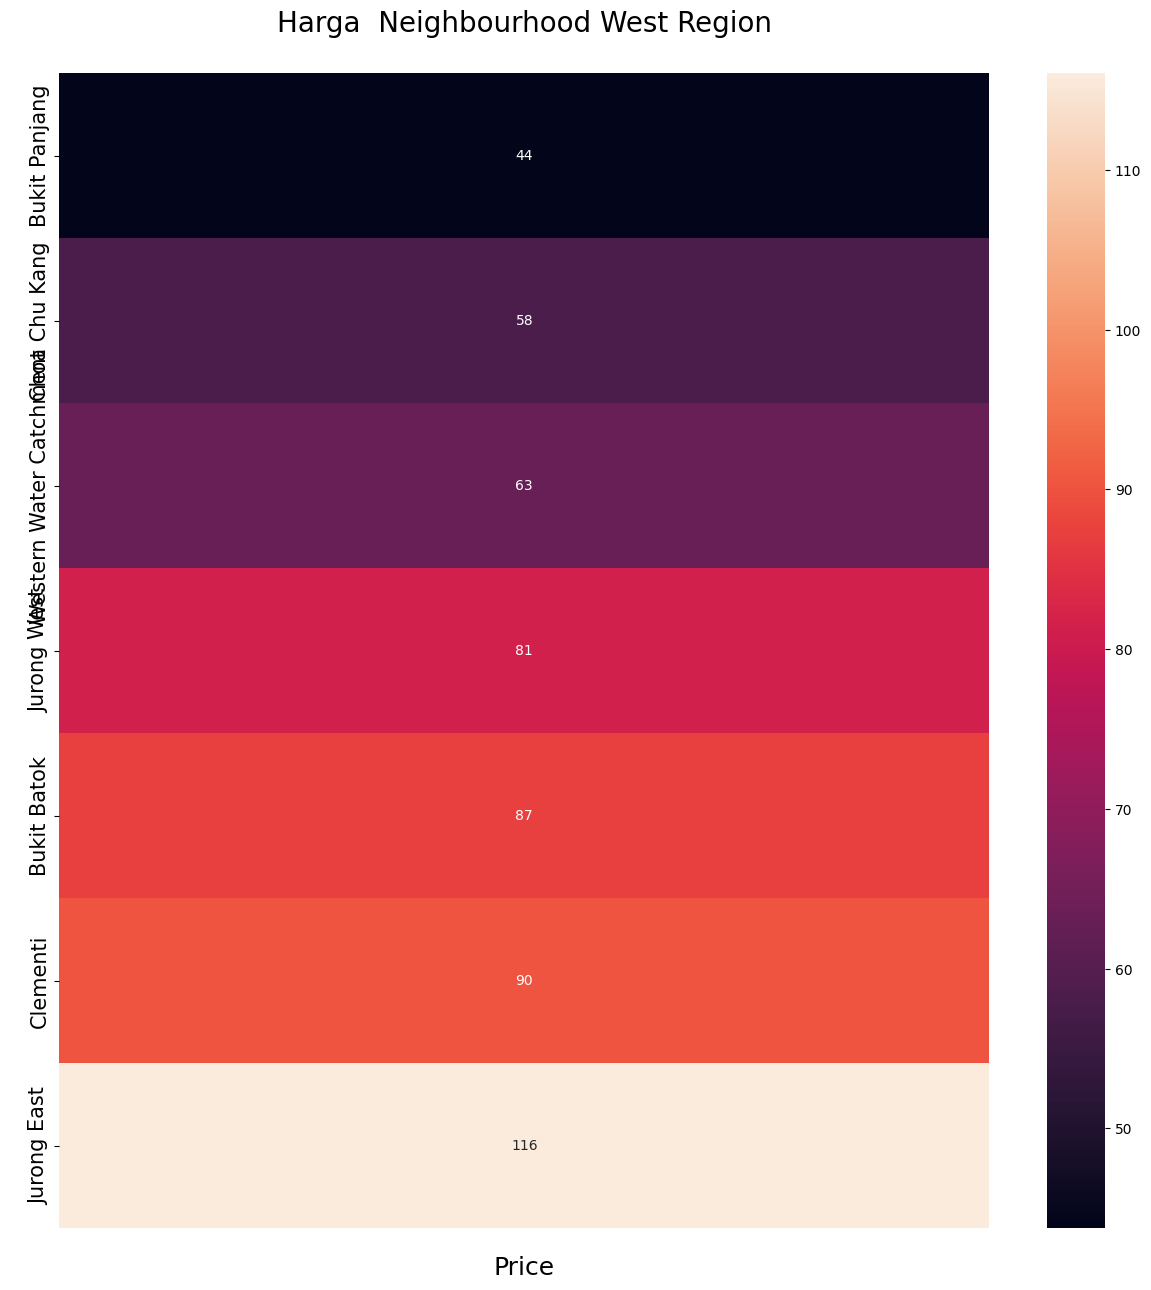

In [37]:
#showing plot
plot_corr_price_neighbourhood(data_west)


In [39]:
# function mapbox distribution price


def plot_mapbox_price_neigbourhood(data):
  title = data.reset_index().at[0,'neighbourhood_group']
  fig = px.scatter_mapbox(data,lat = 'latitude', lon = 'longitude', hover_name= 'name',
                          hover_data= ['neighbourhood'], color = 'price', zoom = 12,
                          mapbox_style='carto-positron')
  fig.update_layout(title = f"<b>Distribution Price {title}<b>", title_font =dict( size = 20, color = 'black', family = 'arial'), title_x = 0.5 )
  fig.show()

In [40]:
# showing plot
plot_mapbox_price_neigbourhood(data_central)
plot_mapbox_price_neigbourhood(data_east)
plot_mapbox_price_neigbourhood(data_west)
plot_mapbox_price_neigbourhood(data_north)
plot_mapbox_price_neigbourhood(data_north_east)

## Corelation Price and Room Type

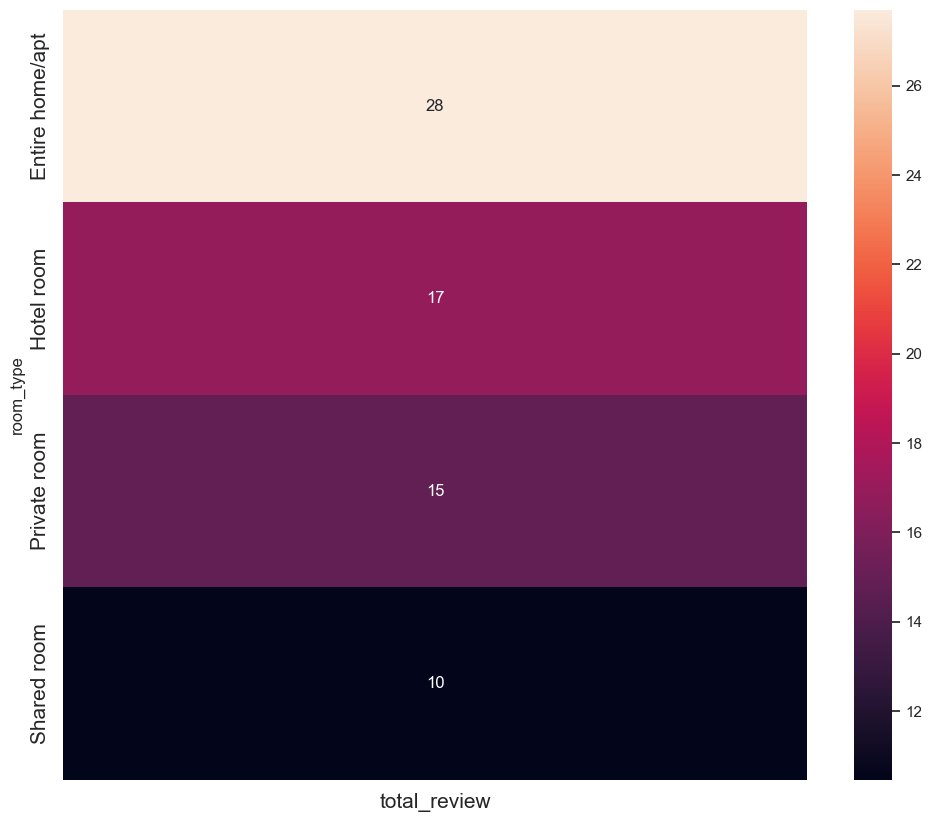

In [41]:
corr = df[['room_type', 'total_review']].groupby(['room_type']).mean()

# membuat heatmap

plt.figure(figsize = (12,10))

ax =sns.heatmap(corr,annot=True)

font = {'family': 'Arial', 'size': 15}

ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
plt.show()

In [42]:
harga_room_ng = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()
harga_room_ng

,neighbourhood_group,room_type,price
0,Central Region,Entire home/apt,168.885417
1,Central Region,Hotel room,101.166667
2,Central Region,Private room,88.025292
3,Central Region,Shared room,59.761194
4,East Region,Entire home/apt,156.571429
5,East Region,Private room,106.573333
6,North Region,Entire home/apt,70.095153
7,North Region,Hotel room,54.272727
8,North Region,Private room,61.602740
9,North Region,Shared room,23.000000


In [43]:
# Membuat contoh data frame
# Create the bar chart
harga_room_ng = harga_room_ng.sort_values('price')
plot_price_room_type_ng = px.bar(harga_room_ng, x="neighbourhood_group", y="price", barmode = 'group',color="room_type", template = 'ggplot2')

plot_price_room_type_ng.update_layout(title = '<b>Harga Room Type Pada Neigbourhood Group<b>', title_font = dict(size = 20, family = 'arial', color = 'black')
                              )

plot_price_room_type_ng.update_xaxes(title = "Room Type", title_font = dict(size = 18, color = "black", family = 'arial'))
plot_price_room_type_ng.update_yaxes(title = 'Price', title_font = dict(size = 18, color = 'black', family = 'arial'))

# Show the chart
plot_price_room_type_ng.show()

## Distribusi Pengunjung

In [44]:
top_review_listing_room_ng = df.groupby(['neighbourhood_group', 'room_type'])['total_review'].sum().reset_index()
top_review_listing_room_ng.sort_values('total_review')

plot_top_review_room_ng = px.bar(top_review_listing_room_ng, x = 'neighbourhood_group', y = 'total_review', color = 'room_type', barmode = 'group', orientation = 'v', opacity = 1, template = 'ggplot2')

plot_top_review_room_ng.update_layout(title = '<b> Distribusi Review Berdasarkan Room Type Pada setiap Neighbourhood Group<b>', title_font = dict(size = 20, color = 'black', family = 'arial'))
plot_top_review_room_ng.update_xaxes(title = 'Neighbourhood Group', title_font = dict(size = 18, color = 'black', family = 'arial'))
plot_top_review_room_ng.update_yaxes(title = 'Jumlah Review', title_font = dict(size = 18, color = 'black', family = 'arial'))

plot_top_review_room_ng.show()




In [46]:
def plot_pie_review_per_neighbourhood(data):
  title = data.reset_index().at[0,'neighbourhood_group']
  if data['neighbourhood'].nunique() > 3:
     # group data into neighbourhood and select 4 highhest total_reviews
     sum_review_neighbourhood = data.groupby('neighbourhood')['total_review'].sum().nlargest()
     # sum of top 4 total review
     top_review = sum_review_neighbourhood.sum()
     # find sum review for other top review
     other_sum_neighbourhood = data['total_review'].sum() - top_review
     
     # find count of variabel other total review (count for data['neighbourhood'] - count for variabel top 4 sum_review_neighbourhood)
     count_other = data['neighbourhood'].nunique() - sum_review_neighbourhood.nunique()
     
     # make data for other_sum_neighbourhood
     other_sum_neighbourhood = (other_sum_neighbourhood / count_other).astype(int)
     
     #add other_sum_neighbourhood to data sum_review_neighbourhood 
     sum_review_neighbourhood['other'] = other_sum_neighbourhood
     sum_review_neighbourhood.sort_values(ascending = False)
     
     # make pie plot 
     fig = px.pie(sum_review_neighbourhood,
               values = sum_review_neighbourhood,
               names = sum_review_neighbourhood.index,
               color = sum_review_neighbourhood.index,
               hole = 0.5)
     fig.update_layout(title = "<b> Distribution Pengunjung Listing <br> Per Neighbourhood </b>", title_font = dict(size = 20, color = 'black', family = 'arial'))
     fig.update_traces(textposition = 'outside', textfont = dict(size = 15, color = 'black', family = 'arial'), textinfo = 'label+percent')
     fig.add_annotation(text = f"<b> {title} <b>", showarrow = False, font = dict(size = 18, color = 'black', family = 'arial'))
     fig.show()
  
  else: 
    sum_review_neighbourhood = data.groupby('neighbourhood')['total_review'].sum()

    fig = px.pie(sum_review_neighbourhood,
               values = sum_review_neighbourhood,
               names = sum_review_neighbourhood.index,
               color = sum_review_neighbourhood.index,
               hole = 0.5)
    fig.update_layout(title = "<b> Distribution Pengunjung Listing <br> Per Neighbourhood </b>", title_font = dict(size = 20, color = 'black', family = 'arial'))
    fig.update_traces(textposition = 'outside', textfont = dict(size = 15, color = 'black', family = 'arial'), textinfo = 'label+percent')
    fig.add_annotation(text = f"<b> {title} <b>", showarrow = False, font = dict(size = 18, color = 'black', family = 'arial'))
    fig.show()






In [47]:
plot_pie_review_per_neighbourhood(data_central)
plot_pie_review_per_neighbourhood(data_east)
plot_pie_review_per_neighbourhood(data_west)
plot_pie_review_per_neighbourhood(data_north)
plot_pie_review_per_neighbourhood(data_north_east)

## Total Review Dibawah dan diatas Rata-rata

In [48]:
mean_total_review_ng = df.dropna().groupby('neighbourhood_group')['total_review'].mean().reset_index()

df['type_total_review'] = df.apply(lambda row: 'Above Mean' if row['total_review']> mean_total_review_ng.loc[mean_total_review_ng['neighbourhood_group'] == row ['neighbourhood_group'], 'total_review'].iloc[0] else  'Below Mean', axis = 1)

plot_mean_total_review = px.scatter(df, x= 'neighbourhood_group', y = 'total_review', color = 'type_total_review')
plot_mean_total_review.add_hline(y = mean_total_review_ng['total_review'].mean(), line_dash = 'dash', line_color = 'black',  annotation_text = "Mean Total Review")
plot_mean_total_review.show()


C:\Users\Raffi\AppData\Local\Temp\ipykernel_11568\953853956.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
grouped_type_total_review_ng = df.dropna().groupby(['neighbourhood_group', 'type_total_review']).size().reset_index(name ='counts')

plot_type_review = px.bar(grouped_type_total_review_ng, x = 'neighbourhood_group',
                          y = 'counts', color = 'type_total_review', 
                          barmode = 'group', 
                          labels = {'type_total_review' : 'Status Review', 'counts' : 'Jumlah'}, template = 'ggplot2')
plot_type_review.update_layout(title = '<b>Jumlah Listing Dengan Kunjungan Di Bawah Rata-rata dan Di Atas Rata-rata<b>', title_font = dict(size = 20, color= 'black', family = 'arial'))
plot_type_review.update_xaxes(title = 'Neighbourhood Group', title_font= dict(size = 18, color = 'black', family = 'arial'))
plot_type_review.update_yaxes(title = 'Jumlah', title_font = dict(size = 18, color = 'black', family = 'arial'))

plot_type_review.show()

## Listing After Covid 19

In [50]:
df = df.dropna()
# mengubah tipe data kolom 'last_review' menjadi datetime
df['last_review'] = pd.to_datetime(df['last_review'])

# membuat kolom baru dengan kondisi yang diinginkan
df['status_after_covid'] = df['last_review'].apply(lambda x: 'active' if x > pd.Timestamp(2019,1,23) else 'not active')


data_before_after = df.groupby('status_after_covid')['status_after_covid'].count()
data_before_after
pie_before_after_covid = px.pie(data_before_after, values = data_before_after, names = ['Active', 'Not Active'], template = 'ggplot2', color_discrete_sequence= ['#19A7CE', '#146C94'])

pie_before_after_covid.update_layout(title = '<b>Perbandingan Listing Yang Aktif Sesudah dan Sebelum Covid 19<b>', title_font = dict(size = 20, color = 'black', family = 'arial'))
pie_before_after_covid.show()

In [51]:
data_line = dataset.dropna().sort_values('review_date')
data_line

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,neighbourhood_group,review_date
5516,12043317,Vacation home at Taman Pelangi,21825042,Wins,Woodlands,1.472550,103.775180,Entire home/apt,244,1,364,North Region,2018-01-01
9211,8119347,Excellent accommodation & location,31125377,Siong Yew,Woodlands,1.460880,103.767160,Entire home/apt,50,2,205,North Region,2018-01-01
835,14530157,65m2 cozy condo with pool near Paya Lebar MRT,3162951,Nicolas,Geylang,1.314700,103.892890,Entire home/apt,89,365,0,Central Region,2018-01-01
840,12484261,"City room 5mins to Haji, near Suntec/MBS/Merlion",3234859,Sk,Rochor,1.302490,103.860350,Private room,64,92,0,Central Region,2018-01-01
1462,5889741,Entire Home in the Heart of City,5365111,Y,Rochor,1.301530,103.853440,Entire home/apt,173,92,121,Central Region,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,4008423,"City 1-Pax Private Room, Shared Toilet",12067440,Peggy,Kallang,1.311790,103.860020,Private room,62,1,348,Central Region,2022-09-22
27239,32773291,"★Astonishing ""270"" Unblock Sea view Danga Bay★",136838494,Joey,Lim Chu Kang,1.464481,103.726707,Entire home/apt,126,1,85,North Region,2022-09-22
41642,580226596963352685,【R&F】The Vintage Collective Suite byⓗⓢ #NEW#,260813040,Havona,Woodlands,1.460850,103.770540,Entire home/apt,43,1,76,North Region,2022-09-22
48985,45962749,3BR Urban Living in Orchard,372124974,Karen,Orchard,1.300650,103.841750,Entire home/apt,1073,6,5,Central Region,2022-09-22


## Kunjungan dari tahun ke tahun

In [54]:

date_agg_data = ''' select  review_date, count(review_date) as total_review
                             from dataset
                             group by review_date
                             order by review_date
                          '''
date_agg_data = pd.read_sql_query(date_agg_data, conn)

date_agg_data['review_date'] = pd.to_datetime(date_agg_data['review_date'])
date_agg_data['date_month'] = date_agg_data['review_date'].apply(lambda x: datetime.strftime(x, '%Y-%m'))

date_agg_data.to_sql('date_agg_data', conn, if_exists= 'replace', index = False)

monthly_agg_data = date_agg_data.groupby('date_month')['total_review'].sum().reset_index()
monthly_agg_data

,date_month,total_review
0,2018-01,447
1,2018-02,432
2,2018-03,507
3,2018-04,527
4,2018-05,548
5,2018-06,603
6,2018-07,705
7,2018-08,698
8,2018-09,726
9,2018-10,672


In [55]:
plot_date_review = px.line(monthly_agg_data,x = 'date_month', y = 'total_review', markers = True)

plot_date_review.update_layout(title = '<b>Penyewaan Listing di Airbnb Singapore dari tahun 2018 - 2022<b>', title_font = dict(size = 20, color = 'black', family = 'arial'), title_x = 0.5, template = 'ggplot2')
plot_date_review.update_xaxes(title = 'Date', title_font = dict(size = 18, color = 'black', family = 'arial'))
plot_date_review.update_yaxes(title = 'Jumlah', title_font = dict(size = 18, color = 'black', family = 'arial'))
plot_date_review.add_annotation(text = 'Terjadi Penurunan yang tajam dari Desember-April', x = '2020-03', y = '2000', showarrow = False, font = dict(size = 14, color = 'black', family = 'arial'))
plot_date_review.add_annotation(text = 'Terjadi Lonjakan yang cukup tajam', x = '2022-05', y = '700', showarrow = False, font = dict(size = 14, color = ' black', family = 'arial'))
plot_date_review.show()

## Jarak Listing Teraktif Ke Pesisir

In [37]:
data_top_listing_10 = """ 
                                select id, name, host_name, sum(total_review) as total_review, room_type, price, latitude, longitude, neighbourhood, neighbourhood_group
                                from data
                                group by id
                                limit 10 
                                """
data_top_listing_10 = pd.read_sql_query(data_top_listing_10, conn)


In [38]:


# define the coordinates of the Singapore coast

singapore_cost = (1.3008,103.9122 )
data_top_listing_10 = data_top_listing_10.sort_values('latitude')

dist_to_cost = []

for i in range(len(data_top_listing_10)):
  listing_data = (data_top_listing_10.loc[i, 'latitude'], data_top_listing_10.loc[i, 'longitude'])
  dist = haversine(singapore_cost, listing_data)
  dist_to_cost.append(dist)

data_top_listing_10['distance_to_coast'] = dist_to_cost
 

data_top_listing_10.to_sql('data_top_listing_10',conn, if_exists= 'replace', index = False)

data_top_listing_10

,id,name,host_name,total_review,room_type,price,latitude,longitude,neighbourhood,neighbourhood_group,distance_to_coast
7,330089,Cozy Blue Single Room,Kay,4,Private room,55,1.28652,103.81225,Bukit Merah,Central Region,7.174808
6,324945,Cozy Blue Room with large window!,Kay,5,Private room,49,1.28828,103.81020,Bukit Merah,Central Region,7.399523
3,275344,15 mins to Outram MRT Single Room,Kay,5,Private room,49,1.28836,103.81144,Bukit Merah,Central Region,7.343347
5,294281,5 mins walk from Newton subway,Elizabeth,30,Private room,79,1.31142,103.83924,Newton,Central Region,11.286245
9,369141,5mins from Newton Train Station,Elizabeth,25,Private room,79,1.31144,103.83784,Newton,Central Region,7.213477
4,289234,Booking for 3 bedrooms,Belinda,4,Private room,184,1.34490,103.95979,Tampines,East Region,8.196202
2,71903,Room 2-near Airport & EXPO,Belinda,23,Private room,85,1.34531,103.96100,Tampines,East Region,11.424146
0,71609,Ensuite Room (Room 1 & 2) near EXPO,Belinda,10,Private room,145,1.34537,103.95887,Tampines,East Region,11.224001
1,71896,B&B Room 1 near Airport & EXPO,Belinda,4,Private room,85,1.34754,103.95958,Tampines,East Region,7.631320
8,344803,Budget short stay room near EXPO,Belinda,36,Private room,42,1.34917,103.96090,Tampines,East Region,8.350555


In [36]:
plot_distance_cost = px.scatter(data_top_listing_10, x = 'name', y = 'total_review', size = 'distance_to_coast', color = 'distance_to_coast', size_max = 50, 
                                hover_data = ['price', 'room_type', 'neighbourhood', 'neighbourhood_group'])

plot_distance_cost.update_layout(title = '<b>Plot Grafik Informasi Jarak Ke Pesisir Listing Teraktif<b>', title_font = dict(size = 20, color = 'black', family = 'arial'), title_x =0.5)
plot_distance_cost.update_xaxes(title = 'Listing Name', title_font = dict(size = 18, color = 'black', family = 'arial'), tickangle = 20)
plot_distance_cost.update_yaxes(title = 'Jumlah Review', title_font = dict(size = 18, color = 'black', family = 'arial'))
plot_distance_cost.show()

NameError: name 'data_top_listing_10' is not defined